In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from urllib.parse import urlparse

%matplotlib inline

In [2]:
# Read data from file
dataSet = pd.read_csv('all_data.csv',sep=';',encoding='cp1251')

In [3]:
# Delete not need columns
dataSet = dataSet.drop(
    columns={
        "Unnamed: 0",
        "author",
        "author_type",
        "deal_type",
        "accommodation_type",
        "phone",
        "underground",
        "residential_complex",
        "street",
    },
    axis=1,
)

<Axes: >

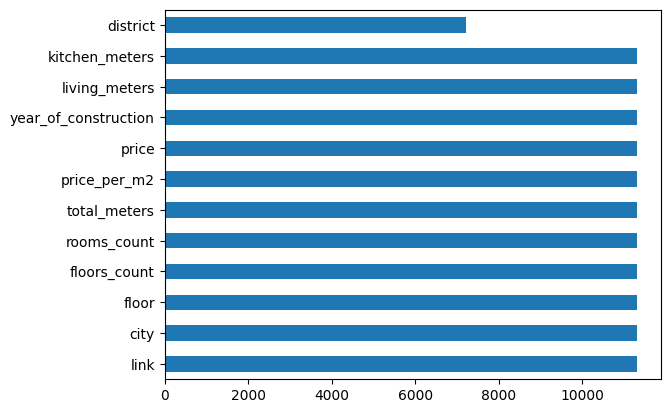

In [4]:
# Нарисовать граф с точностью DataSet
dataSet.count().plot(kind='barh')

In [5]:
def compare_string(str1, str2, countToCompare):
    for i in range(countToCompare):
        if str1[i] != str2[i]:
            return False
    return True


def remove_domen(string):
    strLen1 = string.rfind(".cian.ru")
    strFinal = string[:strLen1]
    return strFinal

In [6]:
# Get all links from Series
urls = dataSet["link"]

# Парсим ссылку,чтобы получить имя города
indexUrl = 0
for url in urls:
    urlCompareReturn = compare_string(url, "https://w", len("https://w"))
    if urlCompareReturn != True:
        urlParsed = urlparse(url)

        # Trim domen name
        cityName = urlParsed.netloc
        cityName = remove_domen(cityName)

        # update value in series
        dataSet['district'].values[indexUrl] = cityName
        dataSet['city'].values[indexUrl] = cityName
    else:
        dataSet['district'].values[indexUrl] = 'Москва'
        dataSet['city'].values[indexUrl] = 'Москва'

    indexUrl += 1

In [7]:
# Drop 'link' because it's not need
dataSet = dataSet.drop(
    columns={
        'link'
    },
    axis=1,
)

<Axes: >

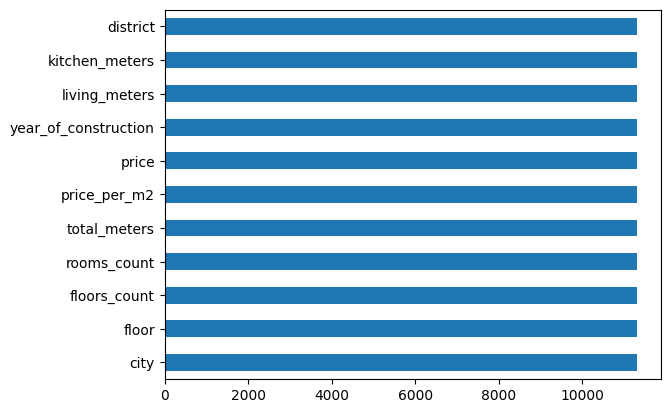

In [8]:
# Граф, показывающий на сколько точен dataSet
dataSet.count().plot(kind='barh')

In [9]:
# fill missing data

mid = np.median(dataSet['living_meters'].values)
dataSet['living_meters'] = dataSet['living_meters'].replace(-1, mid)

mid = np.median(dataSet['kitchen_meters'].values)
dataSet['kitchen_meters'] = dataSet['kitchen_meters'].replace(-1, mid)

mid = np.median(dataSet['year_of_construction'].values)
dataSet['year_of_construction'] = dataSet['year_of_construction'].replace(-1, mid)

mid = np.median(dataSet['floor'].values)
dataSet['floor'] = dataSet['floor'].replace(-1, mid)

mid = np.median(dataSet['floors_count'].values)
dataSet['floors_count'] = dataSet['floors_count'].replace(-1, mid)

mid = np.median(dataSet['rooms_count'].values)
dataSet['rooms_count'] = dataSet['rooms_count'].replace(-1, mid)

mid = np.median(dataSet['total_meters'].values)
dataSet['total_meters'] = dataSet['total_meters'].replace(-1, mid)

mid = np.median(dataSet['price_per_m2'].values)
dataSet['price_per_m2'] = dataSet['price_per_m2'].replace(-1, mid)

mid = np.median(dataSet['price'].values)
dataSet['price'] = dataSet['price'].replace(-1, mid)

In [10]:
dataSet.drop_duplicates(inplace = True)

In [11]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8307 entries, 0 to 11309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  8307 non-null   object 
 1   floor                 8307 non-null   int64  
 2   floors_count          8307 non-null   int64  
 3   rooms_count           8307 non-null   int64  
 4   total_meters          8307 non-null   float64
 5   price_per_m2          8307 non-null   int64  
 6   price                 8307 non-null   int64  
 7   year_of_construction  8307 non-null   int64  
 8   living_meters         8307 non-null   float64
 9   kitchen_meters        8307 non-null   float64
 10  district              8307 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 778.8+ KB


<Axes: >

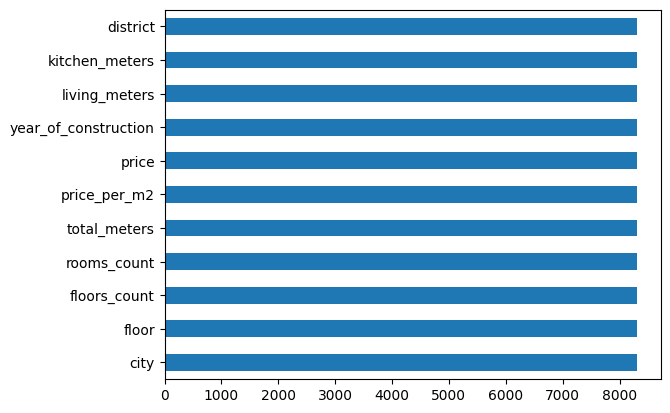

In [12]:
# Граф, показывающий на сколько точен dataSet
dataSet.count().plot(kind='barh')

In [13]:
dataSet.shape

(8307, 11)

In [14]:
# save to file for test, if need uncomment
dataSet.to_csv("clear_all_data.csv")